## **Assesment 1 - Supervised Prediction**

##### **Introduction**

In the following documentation, we will investigate the use of Nearest Neighbor methods to address regression problems. We want to explore the relationship between the independent variables (features): Government stringency, CH index, government response index, economic support index and time, with the dependent (target) variable reproduction rate, which measures the reproduction rate of the COVID-19 virus. Our training and test data is divided by country, and thus our aim is to predict the reproduction rate for a specific country, using the independent variables for that country. This could be applicable in cases where the independent variables variables for a country are known (e.g. we know what measures its government put in place and how much economic support it received, but we do not know the true values of its COVID-19 reproduction rate).

In the context of this problem, the KNN model takes the weighted average of the values of the target variable (reproduction rate) from the nearest neighbors in the training set to predict the value for each test point. In this case, "distance" can be calculated between the independent variables using a variety of metrics such as Euclidean distance, or Manhattan distance. We will start by considering Euclidean distance.

The following pre-requisites are required:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

We will also convert the xlsx dataset into a csv file for ease using the following code (edit file_path as appropriate):

In [4]:
test_file_path = '/home/lucyanthony/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/test.xlsx'
train_file_path = '/home/lucyanthony/University/bristol/year_4/DataScienceToolbox/Assessment1/Datasets/train.xlsx'
test_data = pd.read_excel(test_file_path)
train_data = pd.read_excel(train_file_path)
test_data.to_csv('test.csv', index=False)
train_data.to_csv('train.csv', index=False)

First we will consider a K-Nearest Neighbor model where k = 5. In the following code we will clean the data to remove any columns containing NaN, and then we will scale the independent variables so that the KNN model can be applied.

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

indep_train = train_data[['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
dep_train = train_data['reproduction_rate']
indep_test = test_data[['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
dep_test = test_data['reproduction_rate']

# We will deal with missing values initially by simply removing rows containing missing values

train_data_cleaned = train_data.dropna(subset=['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since', 'reproduction_rate'])
test_data_cleaned = test_data.dropna(subset=['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since', 'reproduction_rate'])

indep_train = train_data_cleaned[['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
dep_train = train_data_cleaned['reproduction_rate']
indep_test = test_data_cleaned[['Stringency Index', 'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'days_since']]
dep_test = test_data_cleaned['reproduction_rate']

# Knn models are distance based, so scaling of features (indep. variables) is essential

scaler = StandardScaler()

# We apply the function fit_transform to the training data which chooses model parameters according to the mean and standard deviation
# We apply simply the transform function to the test data since the model parameters have already been chosen

indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

Now we will use KNeighborsRegressor package from sklearn to apply the KNN model. 

In [6]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

# Now we will test the performance of our model

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=5: {mse}')

Mean Squared Error for k=5: 0.2401019849882936


We can see that the MSE is 0.2401 which we will use as our baseline. We will now try to improve our model performance by adjusting the hyperparameters and will create a scatter graph to visualise our model performance.

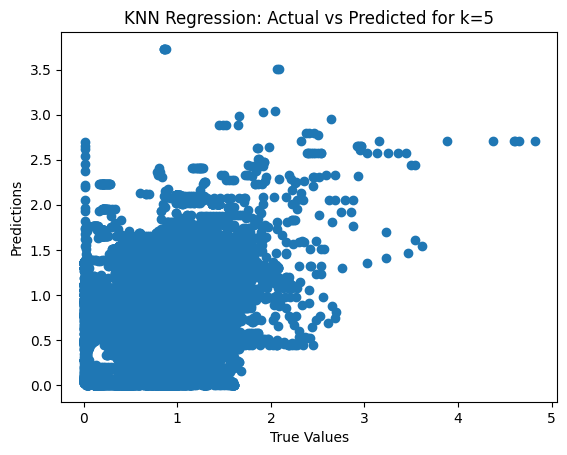

In [7]:
plt.scatter(dep_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("KNN Regression: Actual vs Predicted for k=5")
plt.show()

While the graph shows a roughly positive correlation, the points are concentrated around the lower true values, suggesting that the KNN model might be struggling to make accurate predictions, particularly when the true values are higher. Equally, the fact that the points don't lie close to the diagonal line implies prediction errors. The first improvement we are going to make is to try different values of k.

In [11]:
# KNN model for k=6
knn6 = KNeighborsRegressor(n_neighbors=6)
knn6.fit(indep_scaled_train, dep_train)
prediction6 = knn6.predict(indep_scaled_test)
mse6 = mean_squared_error(dep_test, prediction6)
print(f'Mean Squared Error for k=6: {mse6}')

# KNN model for k=8
knn8 = KNeighborsRegressor(n_neighbors=8)
knn8.fit(indep_scaled_train, dep_train)
prediction8 = knn8.predict(indep_scaled_test)
mse8 = mean_squared_error(dep_test, prediction8)
print(f'Mean Squared Error for k=8: {mse8}')

# KNN model for k=10
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(indep_scaled_train, dep_train)
prediction10 = knn10.predict(indep_scaled_test)
mse10 = mean_squared_error(dep_test, prediction10)
print(f'Mean Squared Error for k=10: {mse10}')

# KNN model for k=12
knn12 = KNeighborsRegressor(n_neighbors=12)
knn12.fit(indep_scaled_train, dep_train)
prediction12 = knn12.predict(indep_scaled_test)
mse12 = mean_squared_error(dep_test, prediction12)
print(f'Mean Squared Error for k=12: {mse12}')

Mean Squared Error for k=6: 0.23732780101837822
Mean Squared Error for k=8: 0.23257489288880664
Mean Squared Error for k=10: 0.22851846605150805
Mean Squared Error for k=12: 0.22557036034407565


As we can see, the MSE decreases as k increases, indicating that the predictions are becoming more accurate. This could be because larger k reduces overfitting, by reducing the influence of individual noisy data points. Increasing k can often result in a higher bias, but lower variance, though the decrease in MSE here indicates that the model ois finding a better bias-variance balance. We will also plot graphs of the residuals to help us to visualise if the model is over or under-fitting 

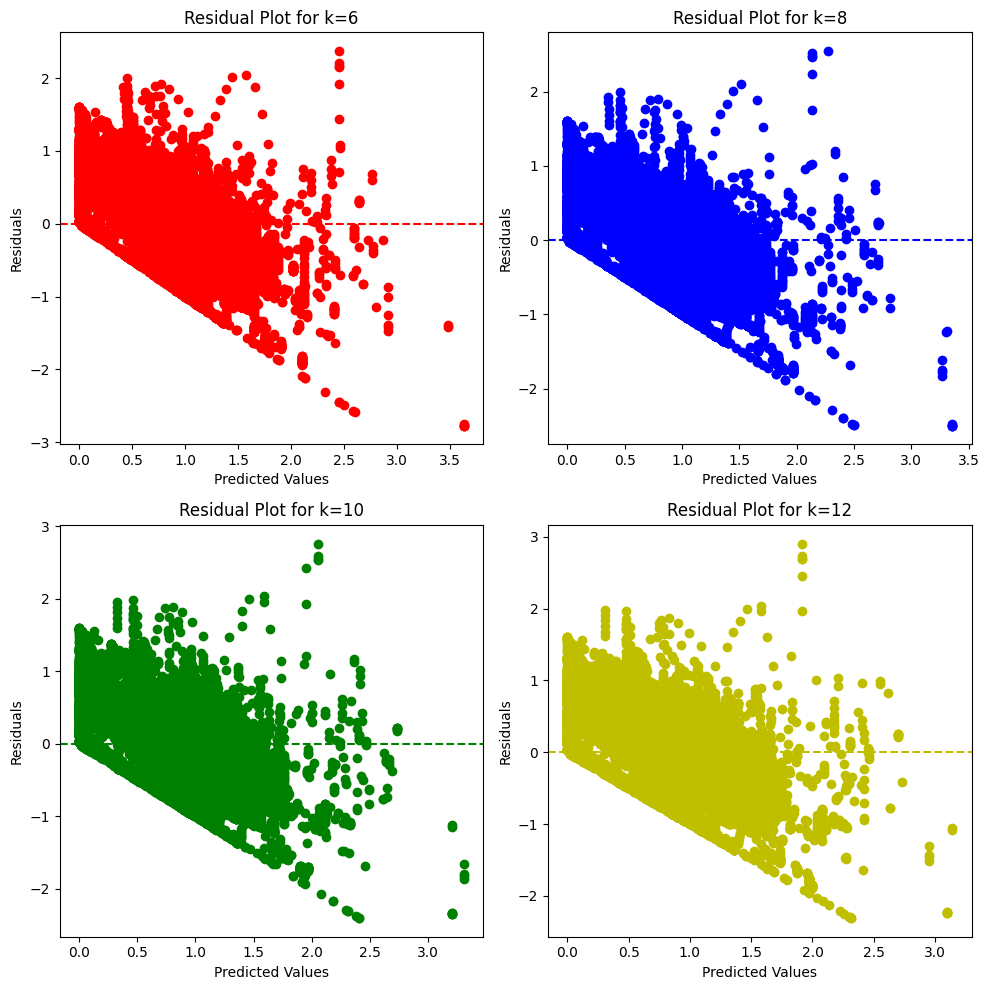

In [14]:
true_values = dep_test
residuals6 = true_values - prediction6
residuals8 = true_values - prediction8
residuals10 = true_values - prediction10
residuals12 = true_values - prediction12

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].scatter(prediction6, residuals6, color='r')
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residual Plot for k=6')

axes[0, 1].scatter(prediction8, residuals8, color='b')
axes[0, 1].axhline(y=0, color='b', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Residual Plot for k=8')

axes[1, 0].scatter(prediction10, residuals10, color='g')
axes[1, 0].axhline(y=0, color='g', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot for k=10')

axes[1, 1].scatter(prediction12, residuals12, color='y')
axes[1, 1].axhline(y=0, color='y', linestyle='--')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residual Plot for k=12')

plt.tight_layout()
plt.show()

The negative slope in the residuals suggests that the model is systematically under-predicting the higher values and possibly over-predicting some lower values. Equally the residuals fan out slightly as the predicted values increase. This phenomenon is called heteroscedasticity, where the error variance changes across the range of predicted values. In this case, it seems the model struggles more with larger predicted values. Additionally, we can see that all the graphs are relatively similar, indicating that the value of k is not having a huge impact on the accuracy of our model. We will now experiment with changing the metric to see how this affects the performance of our model. We will first try the Manhattan metric. The KNN model implicitly assumes that the distance between two points correlates to how similar they are. Thus, the Manhattan metric treats each dimension more equally than Euclidean distance by summing absolute distances (instead of squaring and square-rooting), and this makes it more robust to outliers since large distances do not have such a big impact on the metric.

Mean Squared Error for k=5 and Manhattan metric: 0.22004241483706713


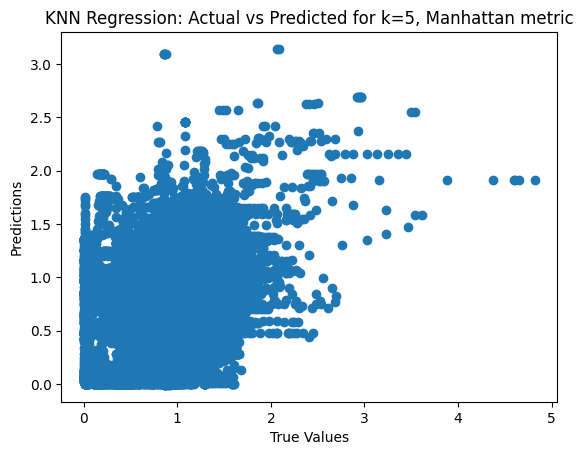

In [15]:
knn = KNeighborsRegressor(n_neighbors=12, p=1) 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric: {mse}')

plt.scatter(dep_test, prediction)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("KNN Regression: Actual vs Predicted for k=12, Manhattan metric")
plt.show()


Again, we have a slightly smaller MSE using the Manhattan metric. This could be due to the fact that the Manhattan metric is generally more robust to outliers, or due to the fact that the Euclidean metric often struggles more with higher dimensions (in our case we have 5 independent variables, so 5 dimensions), again due to the fact that Euclidean distance calculates the square root of the sum of squares, and thus it somewhat distorts the distance between points in multiple dimensions. The next hyperparameters we will adjust are the scaling of the independent variables and the weighting of variables. By default, Knn assigns equal weight to all neighbors, however giving more weight to closer neighbors could improve model performance. In terms of scaling, the default scaler is the StandardScaler which transforms the data so that it has a mean of 0 and standard deviation of 1. Contrastingly the MinMaxScaler shifts and scales the features so that they fit within a specified range. While the StandardScaler is useful for data which follows a normal distribution, it doesn't preserve the relationship between original values and the distance between them. Unlike the others, RobustScaler is robust to outliers since it scales the data according to the interquartile range.

In [29]:
# First, we try MinMaxScaler

scaler = MinMaxScaler()
indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

knn = KNeighborsRegressor(n_neighbors=12, p=1)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric, MinMaxScaler: {mse}')

# Now we will try RobustScaler

scaler = RobustScaler()

indep_scaled_train = scaler.fit_transform(indep_train)
indep_scaled_test = scaler.transform(indep_test)

knn = KNeighborsRegressor(n_neighbors=12, p=1)
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=12 and Manhattan metric, RobustScaler: {mse}')

Mean Squared Error for k=12 and Manhattan metric, MinMaxScaler: 0.2207237439077109
Mean Squared Error for k=12 and Manhattan metric, RobustScaler: 0.21749187657328345


As we can see, RobustScaler performs best for our features, potentially due to the existence of outliers. We will now try changing the weighting.

In [18]:
knn = KNeighborsRegressor(n_neighbors=12, p=1, weights='distance') 
knn.fit(indep_scaled_train, dep_train)
prediction = knn.predict(indep_scaled_test)

mse = mean_squared_error(dep_test, prediction)
print(f'Mean Squared Error for k=5 and Manhattan metric, RobustScaler, weighted: {mse}')

Mean Squared Error for k=5 and Manhattan metric, RobustScaler, weighted: 0.21840112525497465


This MSE is slightly worse. In the default weight setting (weight="uniform"), all neighbours contribute equally to the weight setting, regardless of their distance from the target point. However, in the weight setting weights="distance", neighbours that are closer to the target point are given proportionally more weight than neighbours which are farther away. Thus, for regression, the predicted value is the weighted average of the neighbour's values. The fact that the uniform weight performs better suggests that potentially the neighbours are equally relevant, or that we have a relatively even distribution of data points.

Next we will consider k-fold cross-validation in order to evaluate the model's performance more robustly.

In [20]:
scores = cross_val_score(knn, indep_scaled_train, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse = -scores.mean()
print(f"Average MSE from 3-fold cross-validation: {average_mse}")

Average MSE from 3-fold cross-validation: 0.22284709078532494


Interestingly, this average MSE is worse. We will first try further optimisation of the hyperparameters using GridSearchCV.

In [24]:
param_grid1 = {
    'n_neighbors' : [12, 16, 20], 'weights' : ['uniform', 'distance'], 'p' : [1,2]
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid1, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(indep_scaled_train, dep_train)
print("Best Parameters 3-fold validation: ", grid_search.best_params_)
print("Best MSE 3-fold validation: ", -grid_search.best_score_)

Best Parameters 3-fold validation:  {'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}
Best MSE 3-fold validation:  0.20494153083135203


GridSearchCV shows that the hyperparameters which give the lowest average mean squared error under 3-fold cross-validation are: k = 20, uniform weight, Manhattan metric. Note that this is not necessarily the optimal value of k as it was computationally heavy to try multiple values of k. This combination of hyperparameters gives the smallest MSE yet. The next way we can optimise our model is to consider variable selection using recursive feature elimination (RFE). One of the main benefits of feature selection is that it can reduce the dimensionality of the dataset which makes the algorithm more computationally efficient and can reduce overfitting. RFE recursively removes the least important features and re-trains the model at each step. Since KNN does not inherently provide a way to rank the importance of features, we will also include a linear model to aid with variable selection.

In [32]:
base_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=20, p=1, weights = 'uniform')

rfe = RFE(estimator=base_model, n_features_to_select=3)
rfe.fit(indep_scaled_train, dep_train)
train_rfe = rfe.transform(indep_scaled_train)
test_rfe = rfe.transform(indep_scaled_test)

# RFE and selects important features using the linear regression model
# Now we test the KNN model using these variables

knn_model.fit(train_rfe, dep_train)
predictions = knn_model.predict(test_rfe)
mse = mean_squared_error(dep_test, predictions)

print(f'Mean Squared Error for k=20, p=1, weights="uniform", with selected features: {mse}')
print(f'Selected Features: {rfe.support_}')

Mean Squared Error for k=20, p=1, weights="uniform", with selected features: 0.22232569861245005
Selected Features: [False  True  True  True False]


RFE selects the statistically significant variables to be: 'CH Index', 'Gov Resp Index', 'Econ Sup Index'. We will now test the performance of our model under 3-fold cross validation using only these variables to see if this gives a smaller MSE.

In [37]:
indep_train_vs = train_data_cleaned[['CH Index', 'Gov Resp Index', 'Econ Sup Index']]
indep_test_vs = test_data_cleaned[['CH Index', 'Gov Resp Index', 'Econ Sup Index']]

scaler = RobustScaler()
indep_scaled_train_vs = scaler.fit_transform(indep_train_vs)
indep_scaled_test_vs = scaler.transform(indep_test_vs)

knn = KNeighborsRegressor(n_neighbors=20, p=1, weights='distance')

scores_vs = cross_val_score(knn, indep_scaled_train_vs, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse = -scores.mean()
print(f"Average MSE from 3-fold cross-validation, with variable selection: {average_mse}")

Average MSE from 3-fold cross-validation, with variable selection: 0.22284709078532494


This model performs worse according to our metric of MSE. We will now try an alternative method for variable selection, Principal Component Analysis (PCA). PCA reduces the number of features by transforming the original features into a new set of variables (principal components) that still capture most of the variance in the data. Also PCA is a linear transformation, which means it works best when the relationship between the features and the target variable is approximately linear. Note than we will choose the n_component to be 0.95, which means that we retain 95% of the variance in the data.

In [41]:
pca = PCA(n_components=0.95)
pca_train = pca.fit_transform(indep_scaled_train)
pca_test = pca.transform(indep_scaled_test)

scores_pca = cross_val_score(knn, pca_train, dep_train, cv=3, scoring='neg_mean_squared_error')
average_mse_pca = -scores_pca.mean()

print(f"Average MSE from 3-fold cross-validation with PCA: {average_mse_pca}")

# We can also train on the full data now, and test on the test data

knn.fit(pca_train, dep_train)
predictions_pca = knn.predict(pca_test)
mse_test_pca = mean_squared_error(dep_test, predictions_pca)

print(f"Test MSE with PCA: {mse_test_pca}")

Average MSE from 3-fold cross-validation with PCA: 0.2039991893236708
Test MSE with PCA: 0.19156497068198067


Using PCA with our optimally chosen hyperparameters gives us a significantly lower MSE. This could be becasue the PCA is removing noise from our data. We will now interpret the results by analysing how much variance is explained by each component.

In [43]:
print(f"Variance explained by each component: {pca.explained_variance_ratio_}")
print(f"Number of components selected: {pca.n_components_}") 
loadings = pca.components_  # Each row corresponds to a principal component
print(loadings)

Variance explained by each component: [0.7611203  0.12095039 0.10862933]
Number of components selected: 3
[[ 0.49134278  0.52789629  0.53530262  0.25445869 -0.35862188]
 [-0.28064988 -0.2906921   0.01207564  0.90146353 -0.15476251]
 [-0.07064226  0.26727508  0.29580283  0.21289622  0.88924102]]


Since components are linear components of the original features, the matrix above shows the weightings of each of the original independent variables in each of the new components. Equally, we can see that 76.1% of variance was explained by the first component, 12.1% by the second component etc. We see from the matrix that the first three variables ('Stringency Index', 'CH Index', 'Gov Resp Index') have the highest weightings in the first component. In the second component, the variable 'Econ Sup Index' has by far the largest weighting. Equally, for the third component, it is 'days_since'. This suggests that all of the original features are important (potentially explaining why RFE performed worse), however the first three features seem to be more important in explaining the variance in PCA. In a machine learning context, variance refers to how much the data points vary from the mean, and thus it measures the extent to which the values of a feature differ from their average value. Variance is important because our goal is to reduce the dimensionality of our dataset as much as possible, while preserving as much of the variance as possible.

### **Conclusion**

We have considered a variety of hyperparameters for our KNN model, such as weight, metric, value of k and scaling, and we have seen how they affect the performance of our model. Overall, we have seen that the model performs best using the hyperparameters: Uniform weight, Manhattan metric, Robust scaling, and a higher k value. We then investigated the use of RFE and PCA for variable selection, and we determined that PCA is the most effective for reducing the MSE of our model.

#### **References**

[Medium](https://medium.com/@luigi.fiori.lf0303/distance-metrics-and-k-nearest-neighbor-knn-1b840969c0f4) - Distance Metrics and K-Nearest Neighbor

[Hilaris](https://www.hilarispublisher.com/open-access/kminusnearest-neighbours-and-kminusfold-cross-validation-for-big-data-of-covid-19-95348.html) - Cross validation for big data

[Arize](https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/) - Deep Dive on KNN